This project aims to build a predictive model that can determine whether a loan applicant is likely to default or repay the loan based on historical data. By analyzing applicant information such as income, credit history, employment status, and other features, the model helps financial institutions make data-driven decisions on loan approvals. This not only minimizes credit risk but also improves operational efficiency in loan processing.

Key Objectives:

* Predict loan approval status using classification algorithms.

* Identify key factors affecting loan eligibility.

* Support banks in minimizing loan defaults and improving customer experience.

# Import the necessary libraries

In [3]:
# Loading and working with data in tabular form (DataFrame)
import pandas as pd
# Numerical operations and handling arrays
import numpy as np
# Plotting graphs and charts
import matplotlib.pyplot as plt
# Creating attractive and informative statistical graphics
import seaborn as sns
# To split the dataset into training and testing 
from sklearn.model_selection import train_test_split
# To normalize the data (important for some models
from sklearn.preprocessing import StandardScaler
# To convert categorical text data into numerical
from sklearn.preprocessing import LabelEncoder
# To print precision, recell, f1-score
from sklearn.metrics import classification_report
# To measure the percentage of correct predictions
from sklearn.metrics import accuracy_score
# To evaluate model performance using confusion matrix
from sklearn.metrics import confusion_matrix
# K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# Random Forestclassifier
from sklearn.ensemble import RandomForestClassifier
# Support Vector classifier
from sklearn.svm import SVC

# Loading the Dataset

In [4]:
df = pd.read_csv("Loan Prediction.csv")

# Display top 5 records

In [5]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Display last 5 records

In [6]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
995,996,6907195,55,5,single,owned,no,Police_officer,Dharmavaram,Andhra_Pradesh,3,10,0
996,997,9253093,54,2,single,rented,yes,Secretary,Danapur,Bihar,2,12,1
997,998,9464966,67,14,single,norent_noown,yes,Statistician,Tiruppur,Tamil_Nadu,14,10,0
998,999,3346084,23,18,single,rented,no,Web_designer,Sambalpur,Odisha,6,13,0
999,1000,5489445,50,7,single,rented,no,Analyst,Rampur,Uttar_Pradesh,5,14,0


# Display all Datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1000 non-null   int64 
 1   Income             1000 non-null   int64 
 2   Age                1000 non-null   int64 
 3   Experience         1000 non-null   int64 
 4   Married/Single     1000 non-null   object
 5   House_Ownership    1000 non-null   object
 6   Car_Ownership      1000 non-null   object
 7   Profession         1000 non-null   object
 8   CITY               1000 non-null   object
 9   STATE              1000 non-null   object
 10  CURRENT_JOB_YRS    1000 non-null   int64 
 11  CURRENT_HOUSE_YRS  1000 non-null   int64 
 12  Risk_Flag          1000 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 101.7+ KB


# 5 Points Summary Data

In [8]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,5.019372e+06,50.499000,9.971000,6.307000,12.06400,0.169000
std,288.819436,2.896929e+06,17.020979,6.006683,3.725403,1.45052,0.374939
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.00000,0.000000
25%,250.750000,2.482026e+06,36.000000,5.000000,3.000000,11.00000,0.000000
50%,500.500000,4.983860e+06,50.000000,10.000000,6.000000,12.00000,0.000000
75%,750.250000,7.505453e+06,66.000000,15.000000,9.000000,13.00000,0.000000
max,1000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.00000,1.000000


# To Check null values

In [9]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Display Numbers of Rows and Columns

In [10]:
df.shape

(1000, 13)

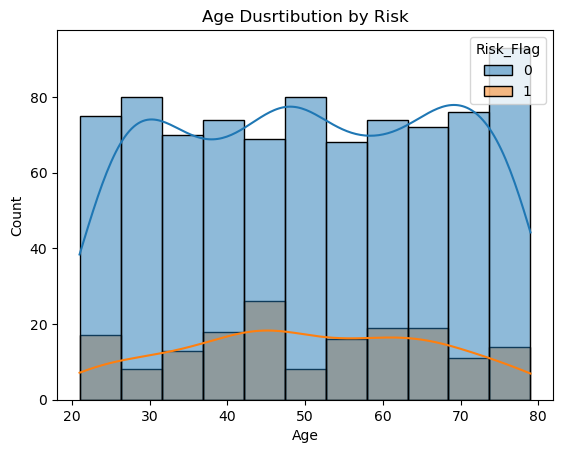

In [11]:
# Age
sns.histplot(data=df,x='Age',hue='Risk_Flag', kde=True)
plt.title('Age Dusrtibution by Risk')
plt.show()

# Observation

# Age Vs. Risk_Flag

1. Most individuals fall under Risk_Flag = 0 (Low Risk) across all age groups.


2. The highest concentration of individuals is between ages 20 to 30.


3. High-risk individuals (Risk_Flag = 1) are much fewer compared to low-risk ones.


4. The age group 40–50 shows a slight increase in high-risk cases.


5. KDE curves indicate multimodal distribution for low-risk individuals.


6. Overall, age does not strongly correlate with increased risk in this dataset.

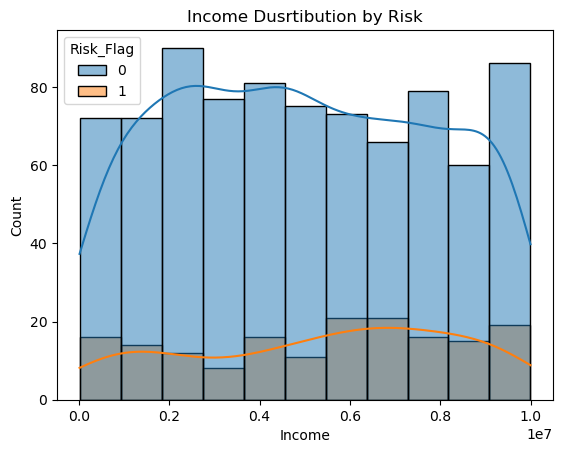

In [12]:
# Income
sns.histplot(data=df,x='Income',hue='Risk_Flag', kde=True)
plt.title('Income Dusrtibution by Risk')
plt.show()

# Observations
# Income vs Risk_Flag

1. Low-risk individuals (Risk_Flag = 0) dominate across all income ranges.


2. High-risk individuals (Risk_Flag = 1) are consistently fewer in number.


3. The income distribution is relatively uniform for low-risk individuals.


4. There is a slight increase in high-risk counts around mid-income levels.


5. KDE plot shows a smooth peak around ₹20–40 lakhs for low-risk group.


6. Overall, income does not show a strong correlation with risk in this dataset.

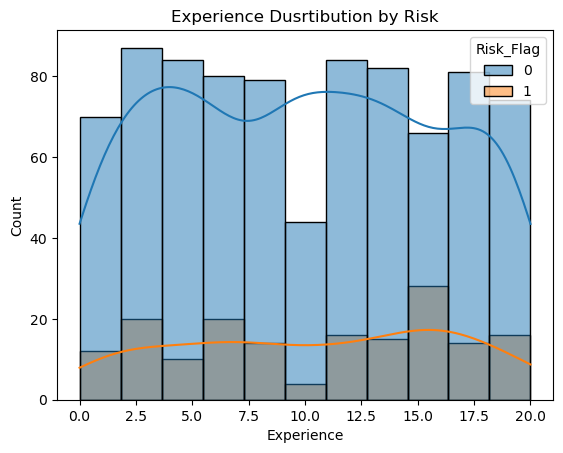

In [14]:
# Experience
sns.histplot(data=df,x='Experience',hue='Risk_Flag', kde=True)
plt.title('Experience Dusrtibution by Risk')
plt.show()

# Observations 
# Experience vs Risk_Flag

1. Low-risk individuals (Risk_Flag = 0) are significantly more frequent across all experience levels.


2. The experience distribution is fairly uniform for low-risk individuals.


3. High-risk cases (Risk_Flag = 1) are consistently low across all experience ranges.


4. A slight peak in high-risk cases is observed around 10–15 years of experience.


5. KDE for low-risk shows multiple peaks, suggesting varied experience levels.


6. Overall, experience does not show a strong correlation with risk in this dataset.

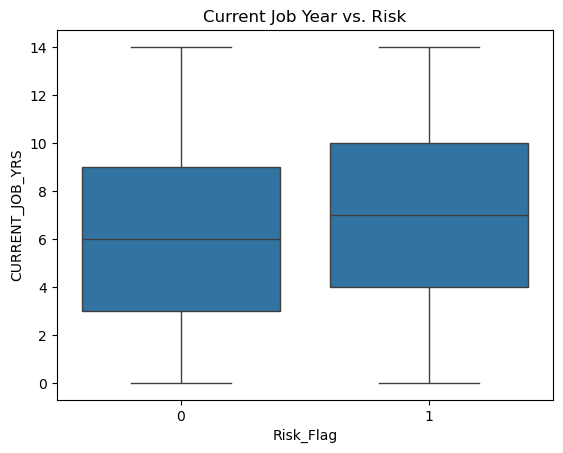

In [17]:
# Current Job Year
sns.boxplot(data=df,x='Risk_Flag',y='CURRENT_JOB_YRS')
plt.title('Current Job Year vs. Risk')
plt.show()

# Observations 
# Current Job Yrs vs Risk_Flag

1. The median job years is slightly higher for high-risk individuals (Risk_Flag = 1).


2. Both risk groups have a similar spread of current job years (approx. 0 to 14 years).


3. The interquartile range (IQR) is nearly the same for both groups.


4. No significant outliers are present in either group.


5. Current job years do not show a strong separation between low and high risk.


6. This suggests that job stability alone is not a key risk factor in this dataset.

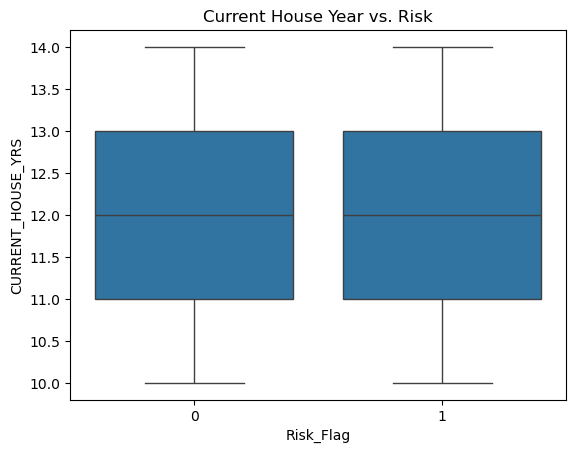

In [18]:
# Current House Year
sns.boxplot(data=df,x='Risk_Flag',y='CURRENT_HOUSE_YRS')
plt.title('Current House Year vs. Risk')
plt.show()

# Observations 
# Current House Yrs vs Risk_Flag

1. Both low-risk (0) and high-risk (1) groups have nearly identical distributions.


2. The median number of years in the current house is around 12 years for both groups.


3. The interquartile range (IQR) and overall spread are very similar.


4. There are no significant outliers in either group.


5. This suggests that residential stability has little to no impact on risk classification.


6. Current house years is likely not a strong predictor of loan risk.


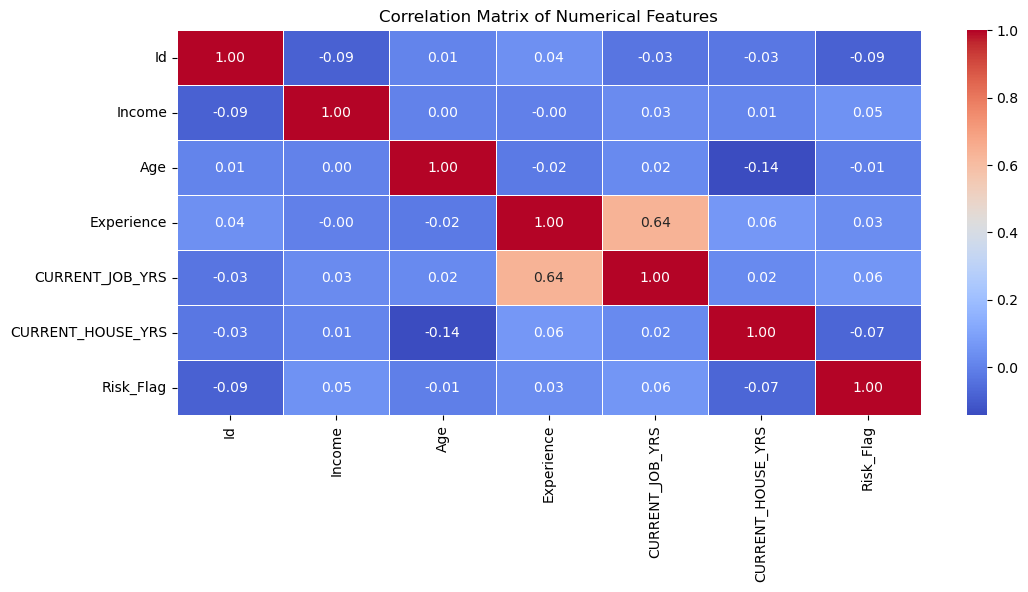

In [20]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Observations
# Correlation Matrix

1. Most numerical features show very weak correlation with the Risk_Flag.


2. Income, Experience, and Current Job Yrs have low positive correlations with Risk_Flag (≤ 0.07).


3. Age has a slightly negative correlation (−0.01), indicating negligible influence on risk.


4. The strongest correlation exists between Experience and Current Job Yrs (0.64), likely due to logical relationship.


5. Overall, no single feature shows a strong linear correlation with loan risk.


6. Feature engineering or non-linear models may be needed to capture complex patterns.

In [23]:
 # Delete those columns which are not usefull
X = df.drop(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], axis=1)
y = df['Risk_Flag']

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=2,random_state=0)

In [29]:
lc = LogisticRegression(max_iter=1000)  # increase max_iter
lc.fit(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lc.fit(X_train_scaled, y_train)

lc = LogisticRegression(solver='liblinear')
lc.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
# Logistic Regression
lc.fit(X_train, y_train)
lc_pred = lc.predict(X_train)  # corrected variable name
print('Accuracy score of Logistic Regression :', 100*metrics.accuracy_score(y_train, lc_pred))

Accuracy score of Logistic Regression : 83.06613226452906


In [31]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_train)
print('Accuracy score of SVC :',100*metrics.accuracy_score(y_train, svc_pred))

Accuracy score of SVC : 83.06613226452906


In [32]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_train)
print('Accuracy score of KNeighbors Classifier :',100*metrics.accuracy_score(y_train, knn_pred))

Accuracy score of KNeighbors Classifier : 86.07214428857716


In [33]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=7, criterion = 'entropy', random_state=7)
rfc.fit(X_train, y_train)
rfc_pred = knn.predict(X_train)
print('Accuracy score of KNeighbors Classifier :',100*metrics.accuracy_score(y_train, rfc_pred))

Accuracy score of KNeighbors Classifier : 86.07214428857716


# Final Summary

KNN and Random Forest classifiers achieve the highest training accuracy.

Further validation using test data or cross-validation is needed to confirm generalization and avoid overfitting.

Random Forest is generally preferred for balanced accuracy and robustness when tuned properly.